# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [54]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
import seaborn as sns

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [19]:
data = pd.read_csv('weight-height.csv')

male_df =  data[data["Gender"] == "Male"]
female_df =  data[data["Gender"] == "Female"]

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

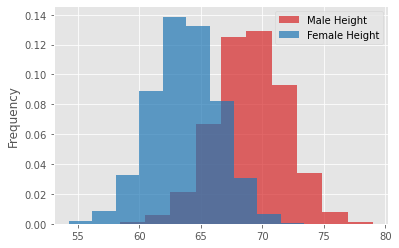

In [29]:
# Your code here
binsize = 10
fig, ax = plt.subplots()

male_df.Height.plot.hist(ax = ax, bins = binsize, alpha = 0.7, 
                         color = "tab:red", label = "Male Height",
                        density = True);

female_df.Height.plot.hist(ax = ax, bins = binsize, alpha = 0.7, 
                         color = "tab:blue", label = "Female Height",
                        density = True);
plt.legend()
plt.show();

In [18]:
# Record your observations - are these inline with your personal observations?

# In average, men have a higher height average compared to women.
# The common region is between 65-67
# Seems that both heights are normally distributed

### From GitHub Solution

# Record your observations - are these inline with your personal observations?

# Men tend to have higher values of heights in general than female.

# The most common region for male and female heights is between 65 - 67 
# inches (about 5 and a half feet).

# Male heights have a slightly higher spread than female heights, 
# hence the male height peak is slightly smaller than female height.

# Both heights are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

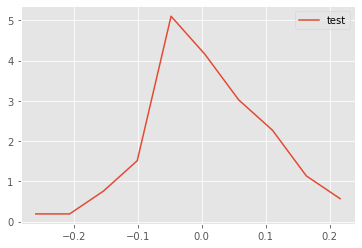

In [34]:
def density(x):
    n, bins = np.histogram(x, 10, density = 1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for i in range(n.size):
        pdfx[i] = 0.5 * (bins[i] + bins[i+1]) 
        pdfy[i] = n[i]
    return pdfx, pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend();

## Add overlapping density plots to the histograms plotted earlier

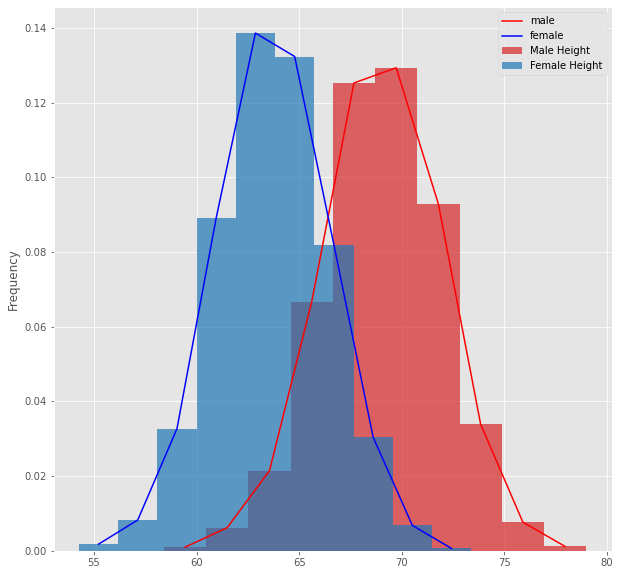

In [42]:
# Your code here 

binsize = 10
fig, ax = plt.subplots(figsize = (10,10))

male_df.Height.plot.hist(ax = ax, bins = binsize, alpha = 0.7, 
                         color = "tab:red", label = "Male Height",
                        density = True);

female_df.Height.plot.hist(ax = ax, bins = binsize, alpha = 0.7, 
                         color = "tab:blue", label = "Female Height",
                        density = True);

x_m,y_m = density(male_df.Height)
plt.plot(x_m,y_m, label = 'male', color = "Red")

x_w,y_w = density(female_df.Height)
plt.plot(x_w,y_w, label = 'female', color = "Blue")

plt.legend()
plt.show();

## Repeat the above exercise for male and female weights

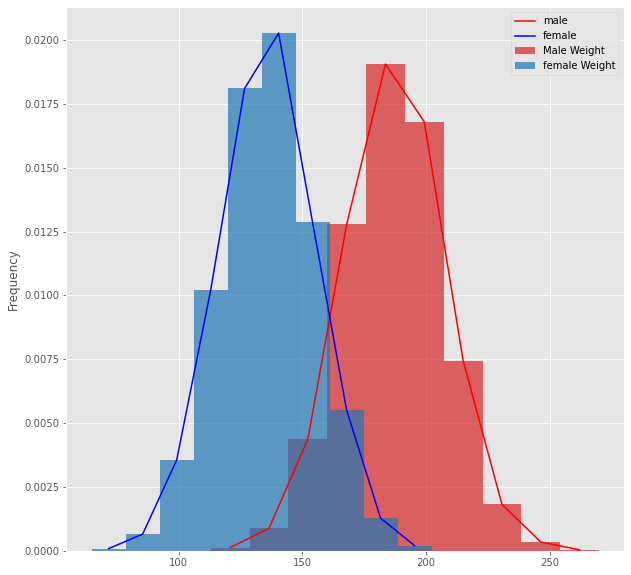

In [53]:
# Your code here 
binsize = 10
fig, ax = plt.subplots(figsize = (10,10))


male_df.Weight.plot.hist(ax = ax, density = True, bins = binsize, 
                         color = "tab:red", alpha = 0.7, 
                         label = "Male Weight")

female_df.Weight.plot.hist(ax = ax, density = True, bins = binsize, 
                           color = "tab:blue", alpha = 0.7, 
                           label = "female Weight")

x_m,y_m = density(male_df.Weight)
plt.plot(x_m,y_m, label = 'male', color = "Red")

x_w,y_w = density(female_df.Weight)
plt.plot(x_w,y_w, label = 'female', color = "Blue")

plt.legend()
plt.show();

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


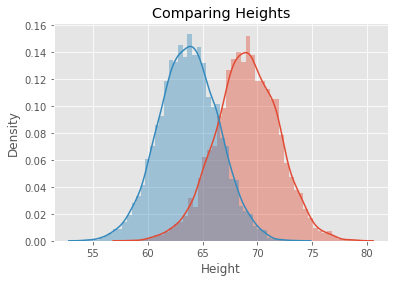

In [64]:
# Code for heights here


sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title("Comparing Heights")
plt.show();


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


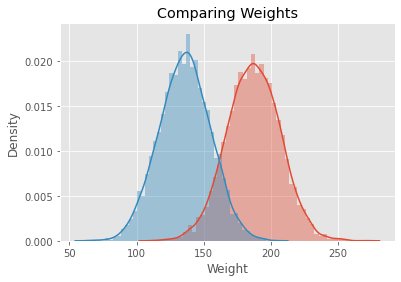

In [65]:
# Code for weights here
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title("Comparing Weights")
plt.show();

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.